In [1]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Add the directory containing the 'scripts' folder to sys.path
project_root = os.path.abspath("..")  # Update as needed based on your folder structure
sys.path.append(project_root)

In [3]:
from scripts.user_engagement import UserEngagement


In [4]:
# Load the data from CSV file
data_file = "D:\\10x\\Projects\\Telecom-Customer-Behavior-and-Engagement-Insights/Data/updated_data.csv"  # Replace with the path to your CSV file
data = pd.read_csv(data_file)

In [5]:
# Step 2: Initialize User Engagement Analysis
user_engagement = UserEngagement(data)

In [6]:
# Step 3: Aggregate Metrics
print("Aggregating engagement metrics...")
aggregated_metrics = user_engagement.aggregate_metrics()
print(aggregated_metrics.head())

Aggregating engagement metrics...
   MSISDN/Number  total_duration  total_download  total_upload
0   3.360100e+10        116720.0    8.426375e+08    36053108.0
1   3.360100e+10        181230.0    1.207552e+08    36104459.0
2   3.360100e+10        134969.0    5.566597e+08    39306820.0
3   3.360101e+10         49878.0    4.019932e+08    20327526.0
4   3.360101e+10         37104.0    1.363130e+09    94280527.0


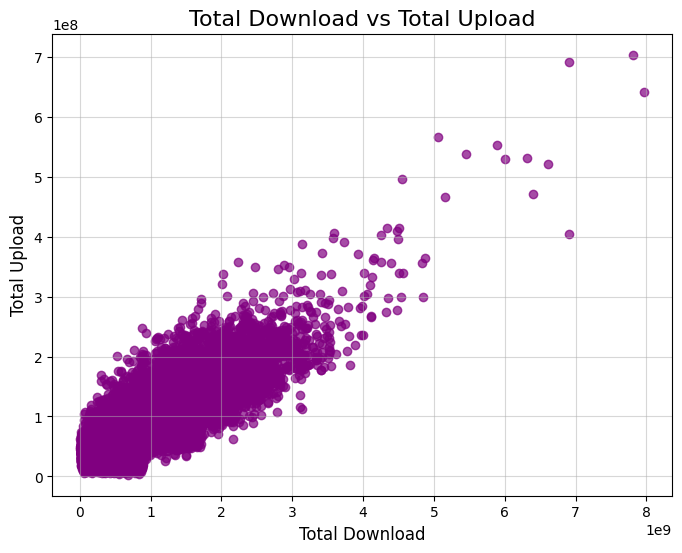

In [7]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(aggregated_metrics['total_download'], aggregated_metrics['total_upload'], color='purple', alpha=0.7)
plt.title('Total Download vs Total Upload', fontsize=16)
plt.xlabel('Total Download', fontsize=12)
plt.ylabel('Total Upload', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

In [8]:
# Step 4: Normalize Metrics
print("Normalizing metrics...")
normalized_metrics = user_engagement.normalize_metrics(aggregated_metrics)
print(normalized_metrics.head())

Normalizing metrics...
   MSISDN/Number  total_duration  total_download  total_upload
0   3.360100e+10        0.005978        0.104780      0.047367
1   3.360100e+10        0.009497        0.014065      0.047441
2   3.360100e+10        0.006974        0.068843      0.052012
3   3.360101e+10        0.002331        0.049407      0.024922
4   3.360101e+10        0.001635        0.170188      0.130477


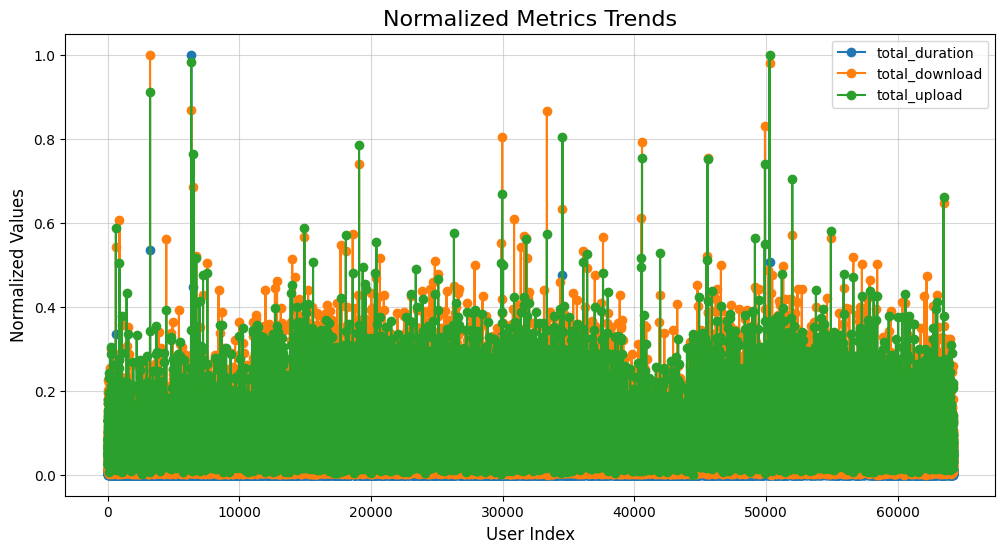

In [10]:
# Line plot for trends
plt.figure(figsize=(12, 6))
for col in normalized_metrics.columns[1:]:  # Exclude identifier column if present
    plt.plot(normalized_metrics.index, normalized_metrics[col], marker='o', label=col)

plt.title('Normalized Metrics Trends', fontsize=16)
plt.xlabel('User Index', fontsize=12)
plt.ylabel('Normalized Values', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [9]:
# Step 5: Perform Clustering
print("Performing clustering...")
clustered_data = user_engagement.perform_clustering(normalized_metrics, k=3)
print(clustered_data.head())

Performing clustering...
   MSISDN/Number  total_duration  total_download  total_upload  cluster
0   3.360100e+10        0.005978        0.104780      0.047367        1
1   3.360100e+10        0.009497        0.014065      0.047441        2
2   3.360100e+10        0.006974        0.068843      0.052012        2
3   3.360101e+10        0.002331        0.049407      0.024922        2
4   3.360101e+10        0.001635        0.170188      0.130477        1


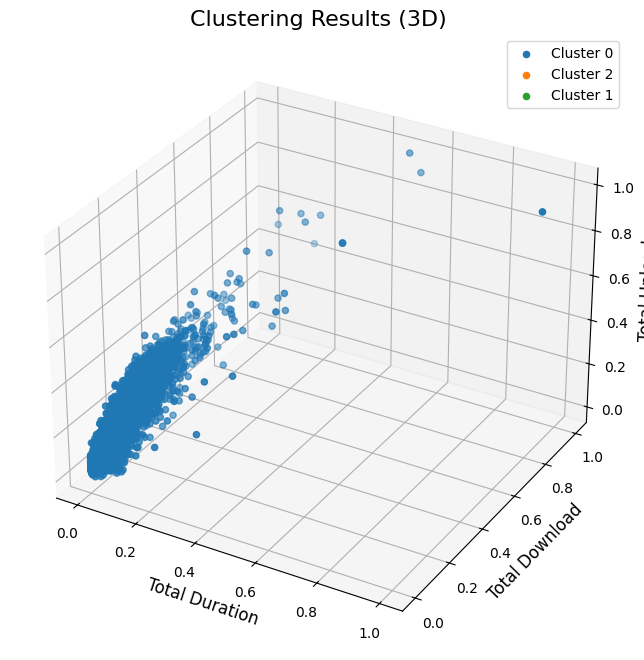

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(normalized_metrics)
clustered_data['Cluster'] = clusters  # Add cluster labels to the DataFrame

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Replace 'Cluster' with the actual column name for cluster labels
for cluster_id in clustered_data['Cluster'].unique():
    cluster_points = clustered_data[clustered_data['Cluster'] == cluster_id]
    ax.scatter(
        cluster_points['total_duration'], 
        cluster_points['total_download'], 
        cluster_points['total_upload'], 
        label=f'Cluster {cluster_id}'
    )

ax.set_title('Clustering Results (3D)', fontsize=16)
ax.set_xlabel('Total Duration', fontsize=12)
ax.set_ylabel('Total Download', fontsize=12)
ax.set_zlabel('Total Upload', fontsize=12)
plt.legend()
plt.show()

In [16]:
# Step 6: Compute Cluster Statistics
print("Computing cluster statistics...")
cluster_stats = user_engagement.compute_cluster_stats(clustered_data)
print(cluster_stats)

Computing cluster statistics...
        total_duration                                 total_download  \
                   min       max      mean         sum            min   
cluster                                                                 
0         8.810720e-04  1.000000  0.028437  104.107924       0.064927   
1         2.182222e-07  0.172815  0.007081  180.747983       0.029958   
2         0.000000e+00  0.085449  0.004913  172.001384       0.000000   

                                         total_upload                      \
              max      mean          sum          min       max      mean   
cluster                                                                     
0        1.000000  0.235257   861.274800     0.084180  1.000000  0.228314   
1        0.218590  0.100336  2561.165162     0.002557  0.237979  0.077947   
2        0.090034  0.038882  1361.138059     0.000000  0.164818  0.054417   

                      
                 sum  
cluster             

In [25]:
# Step 7: Application-Level Traffic Analysis
print("Aggregating application-level traffic...")
app_traffic = user_engagement.aggregate_app_traffic()
print(app_traffic.head())

Aggregating application-level traffic...
   MSISDN/Number  Social Media DL (Bytes)  Social Media UL (Bytes)  \
0   3.360100e+10                2206504.0                  25631.0   
1   3.360100e+10                2598548.0                  62017.0   
2   3.360100e+10                3148004.0                  47619.0   
3   3.360101e+10                 251469.0                  28825.0   
4   3.360101e+10                2861230.0                  51312.0   

   Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  \
0          3337123.0          1051882.0          837400.0          493962.0   
1          4197697.0          1137166.0         2828821.0          478960.0   
2          3343483.0            99643.0         2436500.0          768880.0   
3          5937765.0          3740728.0         2178618.0          106052.0   
4         13728668.0          4770948.0         2247808.0         1057661.0   

   Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  

Finding optimal clusters using the elbow method...


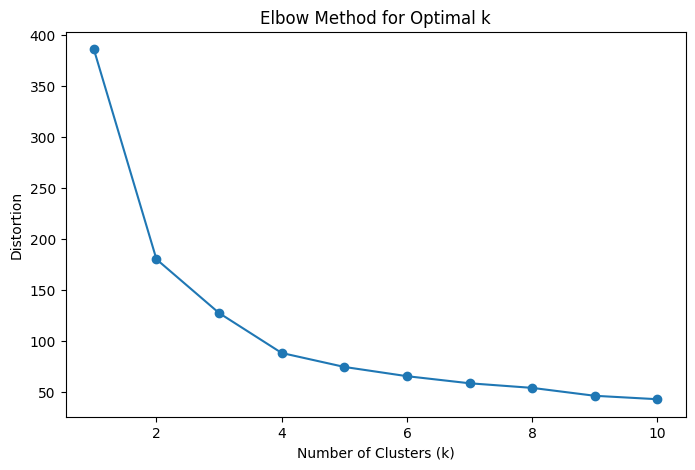

In [12]:
# Step 8: Determine Optimal Clusters
print("Finding optimal clusters using the elbow method...")
user_engagement.elbow_method(normalized_metrics)